In [21]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense,Flatten ,Conv2D ,Reshape,LeakyReLU,Input,Activation,MaxPooling2D,UpSampling2D
from keras.models import Model

In [22]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [23]:
def show_digits(n,dims):
     #original images 
    plt.figure(figsize=(10,5))
    for i in range(n):
        ax=plt.subplot(2,n,i+1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()    # by default in bgr , convert it into grayscale
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i==n/2:
            ax.set_title("Original")
    #re-constructed images
        ax=plt.subplot(2,n,i+n+1)
        plt.imshow(reconstructed[i].reshape(*dims))
        plt.gray() 
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i==n/2:
            ax.set_title("Re-constructed")
    plt.show()

In [24]:
#lets add some noise 
noise=0.7
x_train_noisy = x_train + noise* np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise* np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

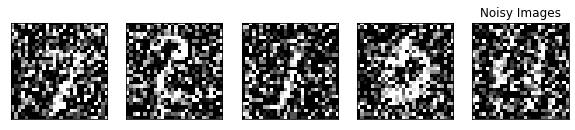

In [25]:
#visualize the noisy data
plt.figure(figsize=(10,5))
for i in range(5):
    ax= plt.subplot(1,5, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Images")
plt.show()

In [26]:
#model 
input_img=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  #opposite of maxpooling
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
autoencoder.fit(x_train_noisy, x_train,
epochs=100)

Epoch 1/100
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1314
Epoch 2/100
60000/60000 [==============================] - 147s 2ms/step - loss: 0.1262
Epoch 3/100
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1238
Epoch 4/100
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1224
Epoch 5/100
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1213
Epoch 6/100
60000/60000 [==============================] - 147s 2ms/step - loss: 0.1207
Epoch 7/100
60000/60000 [==============================] - 147s 2ms/step - loss: 0.1201
Epoch 8/100
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1196
Epoch 9/100
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1193 2s -
Epoch 10/100
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1191
Epoch 11/100
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1188
Epoch 12/100
60000/60000 

60000/60000 [==============================] - 140s 2ms/step - loss: 0.1162
Epoch 93/100
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1163
Epoch 94/100
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1163
Epoch 95/100
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1163 0s - l
Epoch 96/100
60000/60000 [==============================] - 170s 3ms/step - loss: 0.1162
Epoch 97/100
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1162
Epoch 98/100
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1162
Epoch 99/100
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1162
Epoch 100/100
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1162


In [29]:
reconstructed = autoencoder.predict(x_test)

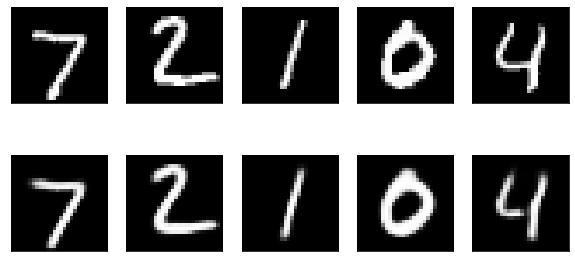

In [31]:
show_digits(5,(28,28))